In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject_BA/DIG Historical Data 1_6.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2024,"27,750.0","27,950.0","28,150.0","27,500.0",9.39M,0.54%
1,05/30/2024,"27,600.0","27,600.0","27,900.0","27,150.0",15.65M,-1.25%
2,05/29/2024,"27,950.0","28,000.0","28,250.0","27,600.0",13.20M,0.36%
3,05/28/2024,"27,850.0","27,600.0","28,300.0","27,550.0",10.45M,1.83%
4,05/27/2024,"27,350.0","27,800.0","27,850.0","27,350.0",14.70M,-1.62%


In [5]:
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '', regex=True)
df['Price'] = df.Price.astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df=df[::-1]

In [6]:
df.set_index('Date', inplace=True)

In [7]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-02,11033.2,"11,006.7","11,059.8","10,927.1",1.60M,0.97%
2018-01-03,11457.6,"11,059.8","11,563.7","11,033.2",5.98M,3.85%
2018-01-04,12094.1,"11,590.2","12,253.3","11,537.2",7.17M,5.56%
2018-01-05,12094.1,"12,279.8","12,545.0","11,935.0",5.20M,0.00%
2018-01-08,12200.2,"12,094.1","12,412.4","11,988.0",7.27M,0.88%


In [8]:
#Chuẩn hóa dữ liệu
df1=df.reset_index()['Price']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1

array([[0.04848431],
       [0.05311725],
       [0.06006556],
       ...,
       [0.23315565],
       [0.22933489],
       [0.23097236]])

In [10]:
# Prepare the dataset
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [11]:
time_step = 100
X, y = create_dataset(df1, time_step)

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [12]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [13]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

test_rmse = np.sqrt(np.mean((test_predict - y_test)**2))
print('Testing RMSE:', test_rmse)
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(test_predict, y_test)
test_mape = np.mean(np.abs(test_predict - y_test)/np.abs(test_predict))*100
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 827.692296907227
Testing MAPE: 2.7113461306134106
Testing MAE: 637.5718026881204


In [14]:
# Predict future 30 days
x_input = df1[len(df1) - time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = time_step
i = 0
while (i < 90):
    if (len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

In [15]:
# Inverse transform the future predictions
future_predict = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

In [16]:
future_predict

array([[27742.72637325],
       [27495.49735345],
       [27211.90580968],
       [27071.41531859],
       [26902.96474734],
       [26484.98473438],
       [26648.89917123],
       [26929.94533353],
       [26264.01010866],
       [26187.69805303],
       [26392.8443312 ],
       [26198.45290609],
       [26686.67442215],
       [26547.1292205 ],
       [27033.44439646],
       [26610.77239347],
       [26243.35423256],
       [26415.05658725],
       [25843.68349429],
       [25630.88948405],
       [25514.25220826],
       [25558.88176282],
       [25465.25741883],
       [25665.47306568],
       [25005.64383272],
       [24903.49539367],
       [24919.53089806],
       [24932.81012537],
       [25084.00162579],
       [25128.65543896],
       [25223.72172865],
       [24695.71361206],
       [24357.34244897],
       [23673.85572063],
       [23516.53082574],
       [23304.6011688 ],
       [23531.38306953],
       [23739.4569553 ],
       [23501.1482137 ],
       [24113.08688314],


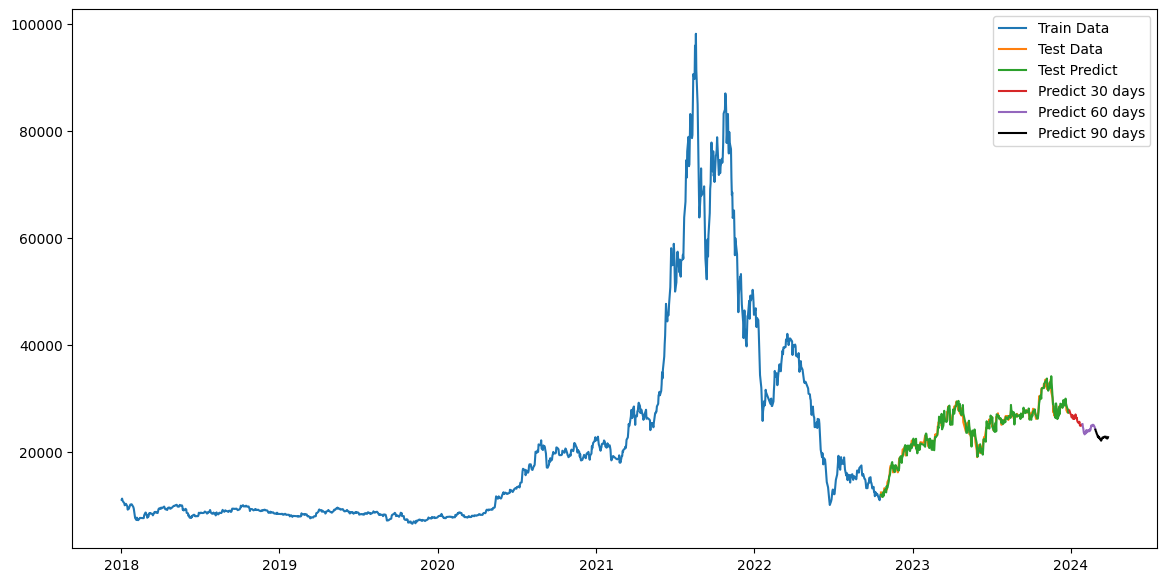

In [23]:
# Plot the results
plt.figure(figsize=(14, 7))

# Plot train data
plt.plot(df.index[:train_size], y_train, label='Train Data')

# Plot test data
plt.plot(df.index[train_size:train_size + test_size], y_test, label='Test Data')

# Plot test predict data
plt.plot(df.index[train_size:train_size + test_size], test_predict, label='Test Predict')

last_test_date = df.index[train_size + test_size - 1]
future_predict_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=30)
future_predict_dates_1 = pd.date_range(start=last_test_date + pd.Timedelta(days=31), periods=30)
future_predict_dates_2 = pd.date_range(start=last_test_date + pd.Timedelta(days=61), periods=30)

plt.plot(future_predict_dates, future_predict[0:30], label='Predict 30 days')
plt.plot(future_predict_dates_1, future_predict[30:60], label='Predict 60 days')
plt.plot(future_predict_dates_2, future_predict[60:90], label='Predict 90 days', color='black')

# Display the legend
plt.legend()

# Display the plot
plt.show()